# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
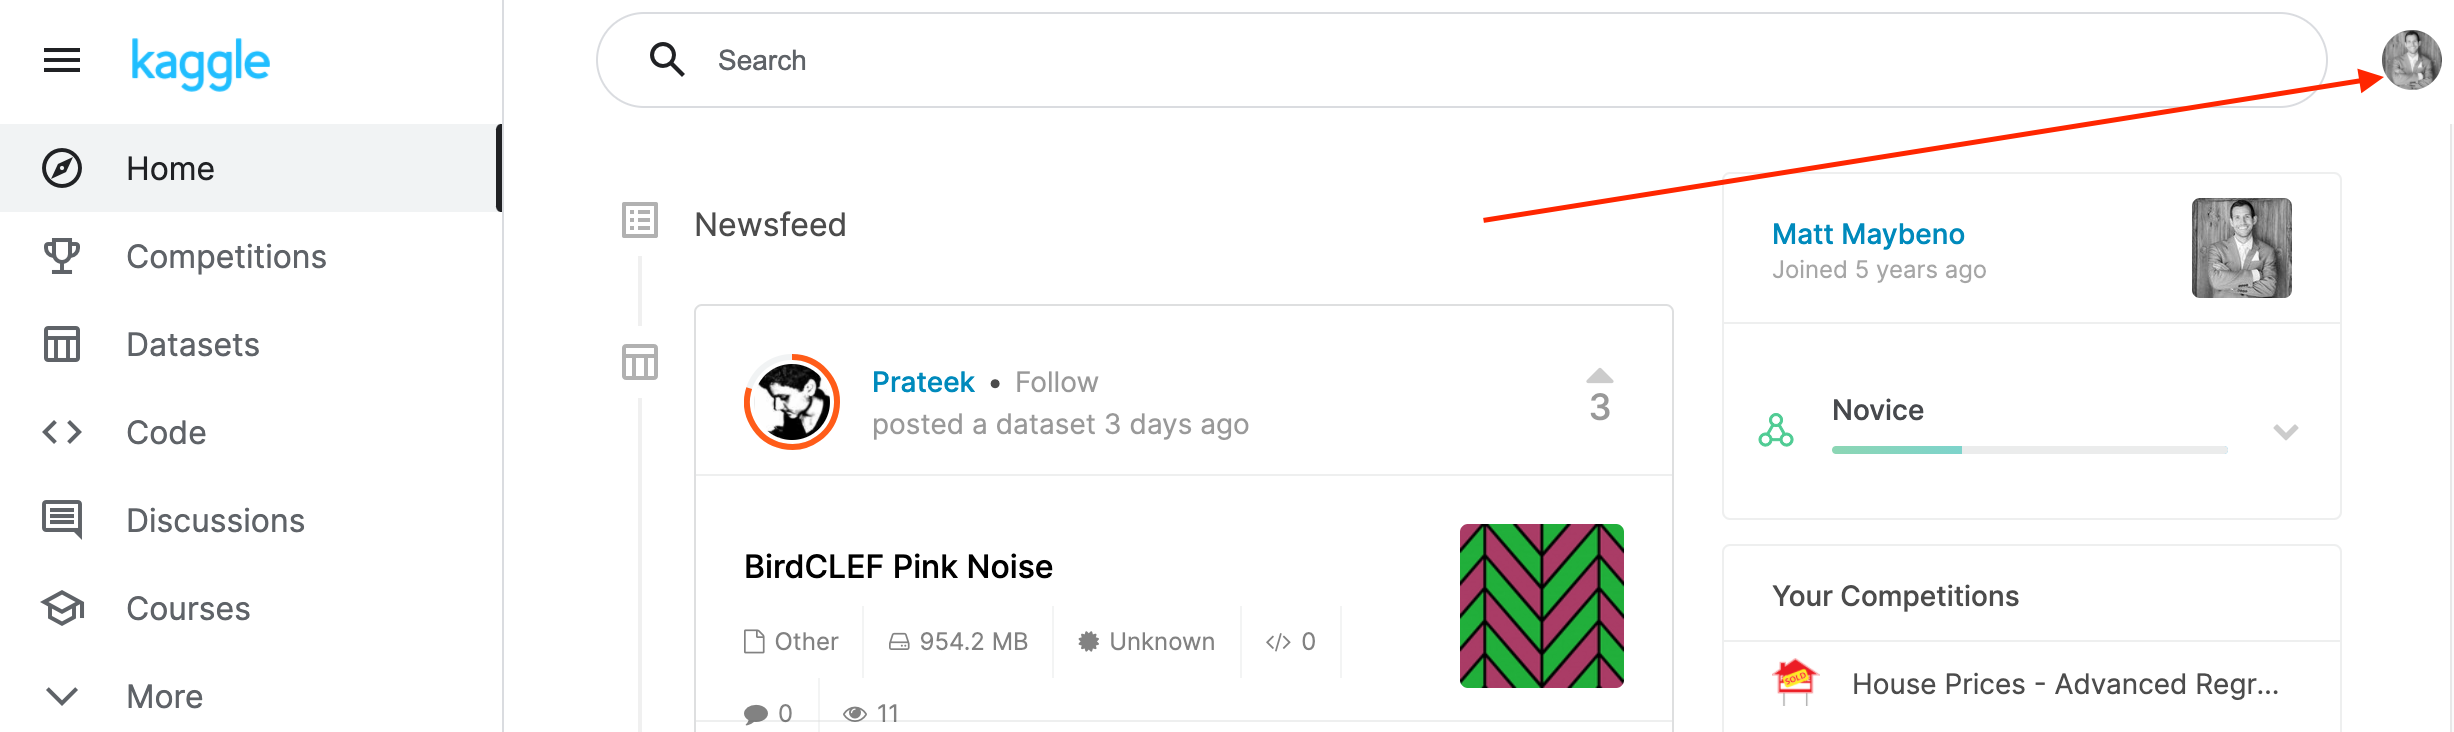
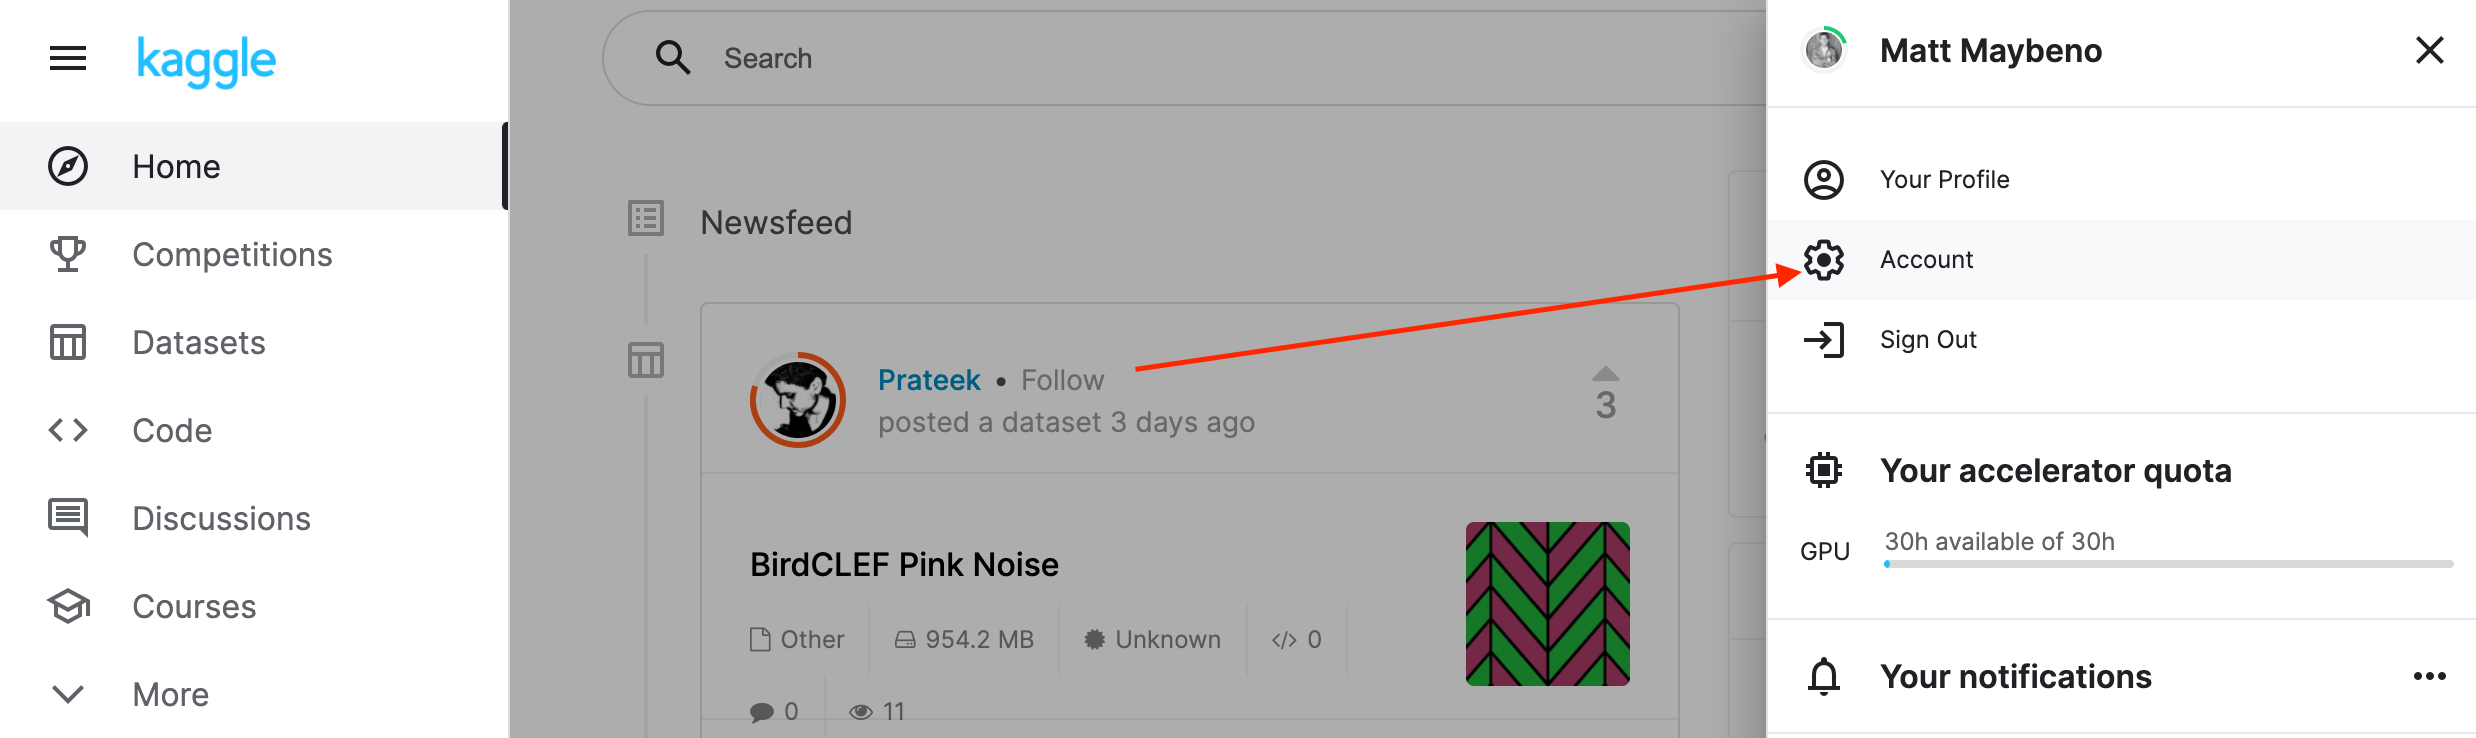
2. Scroll down to API and click Create New API Token.
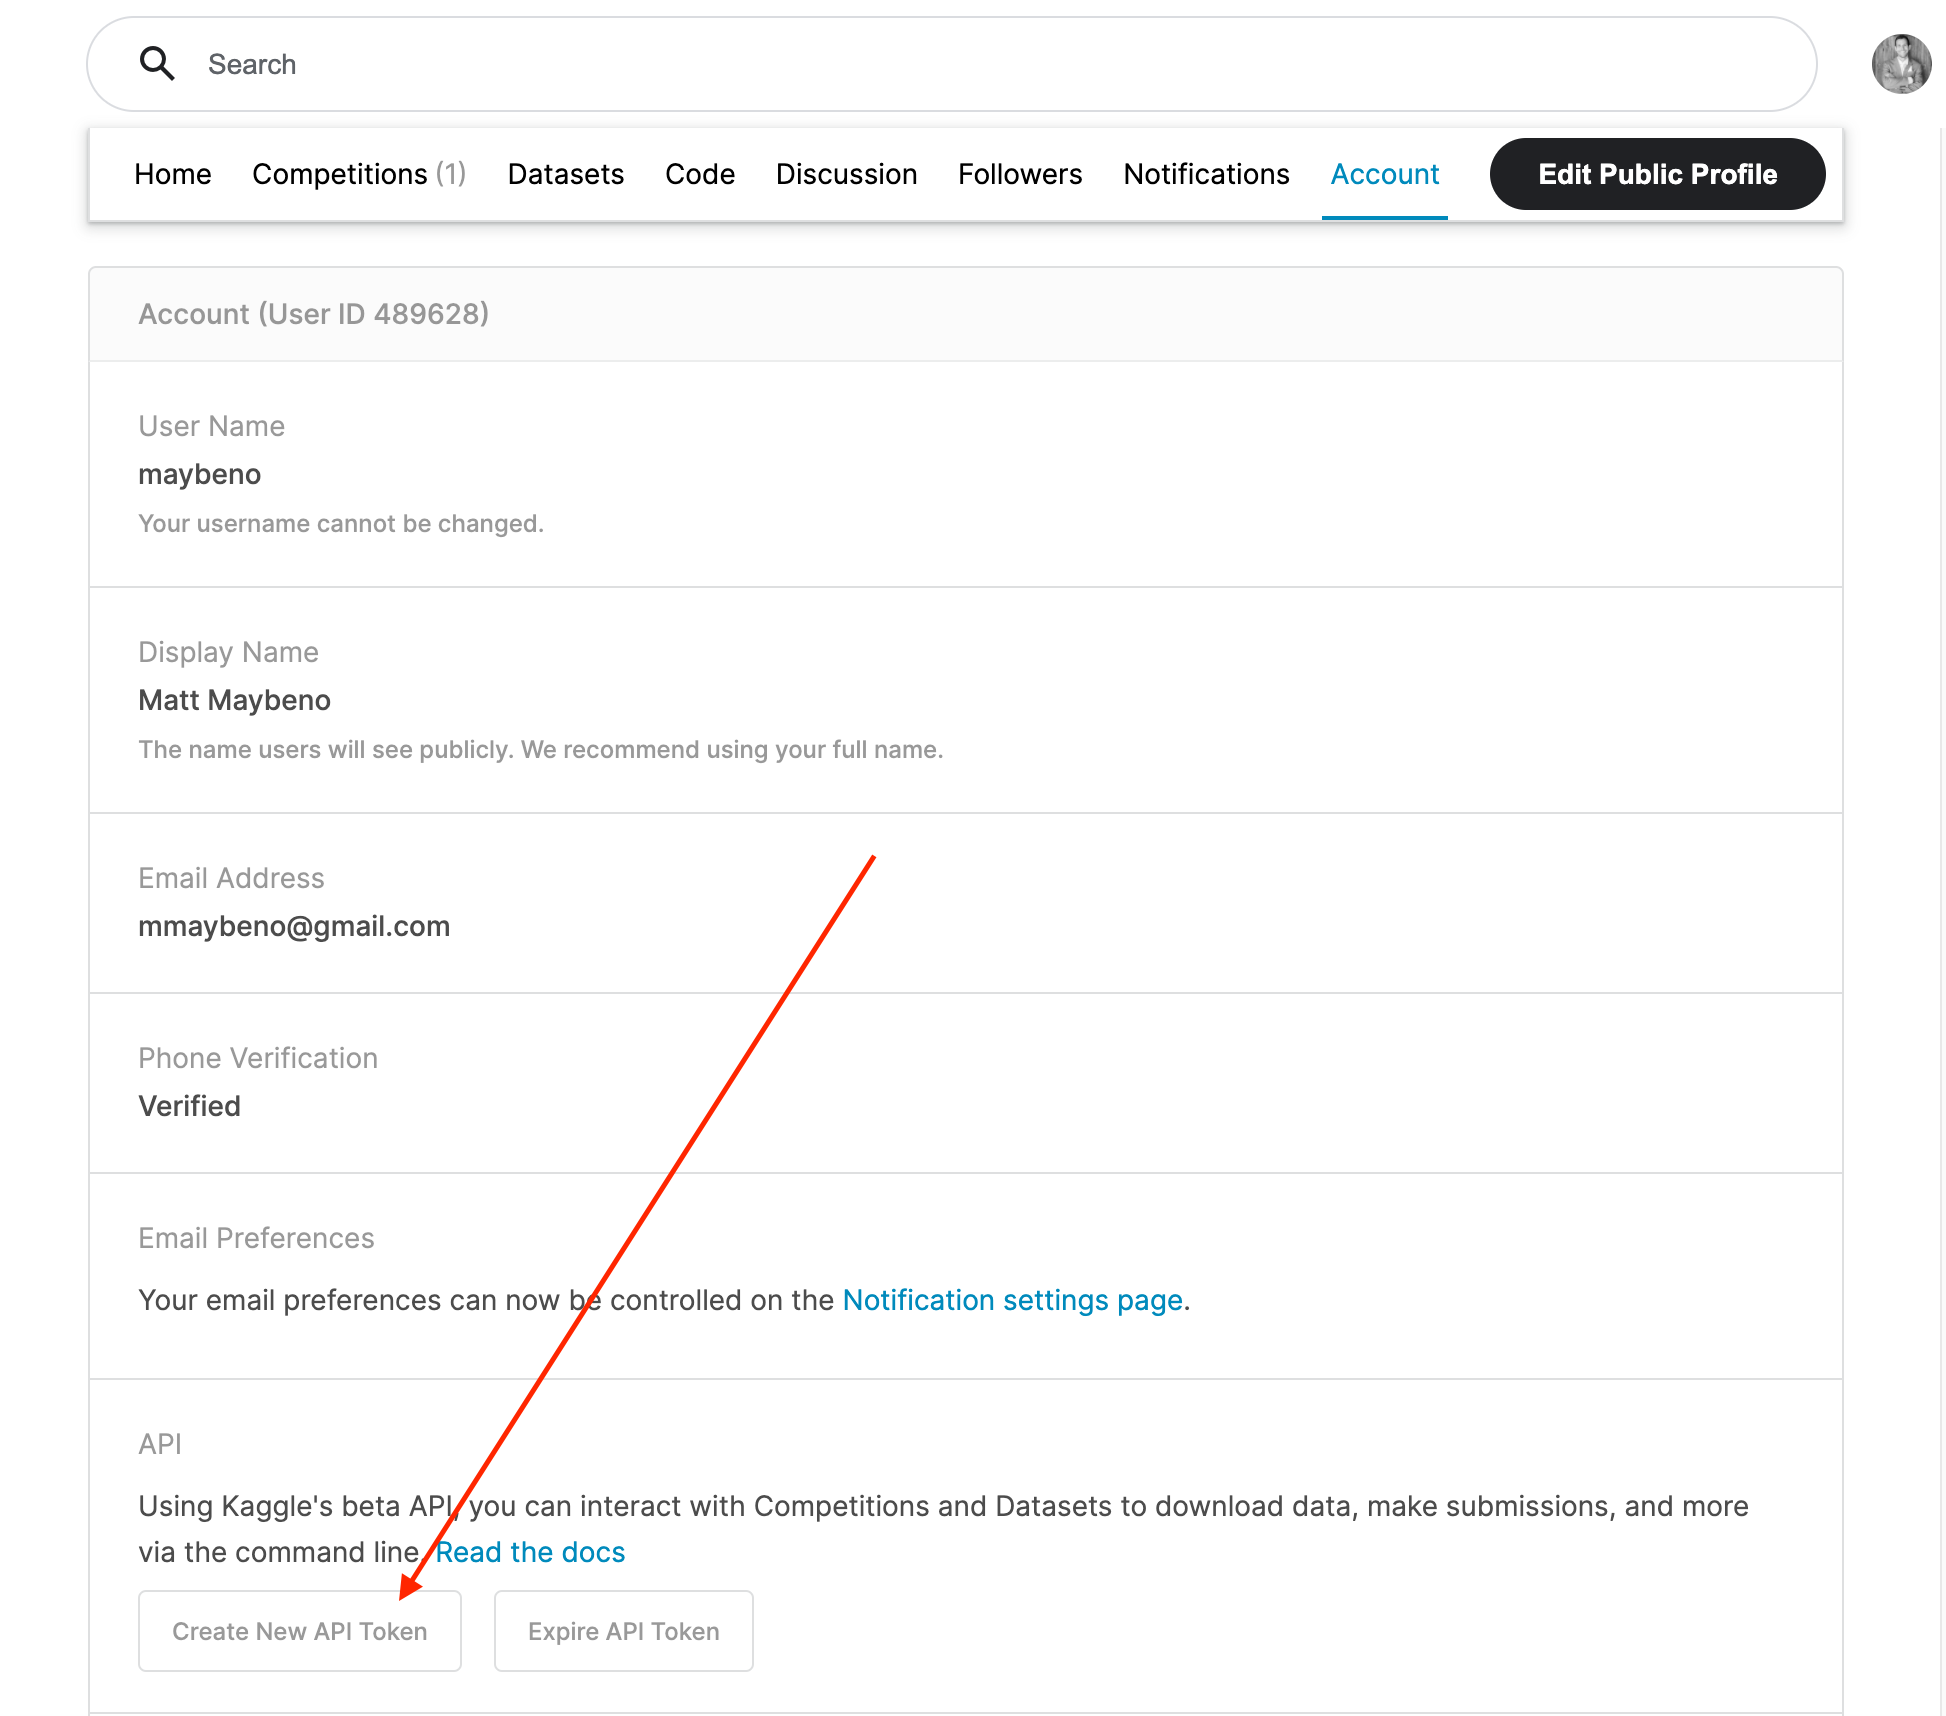
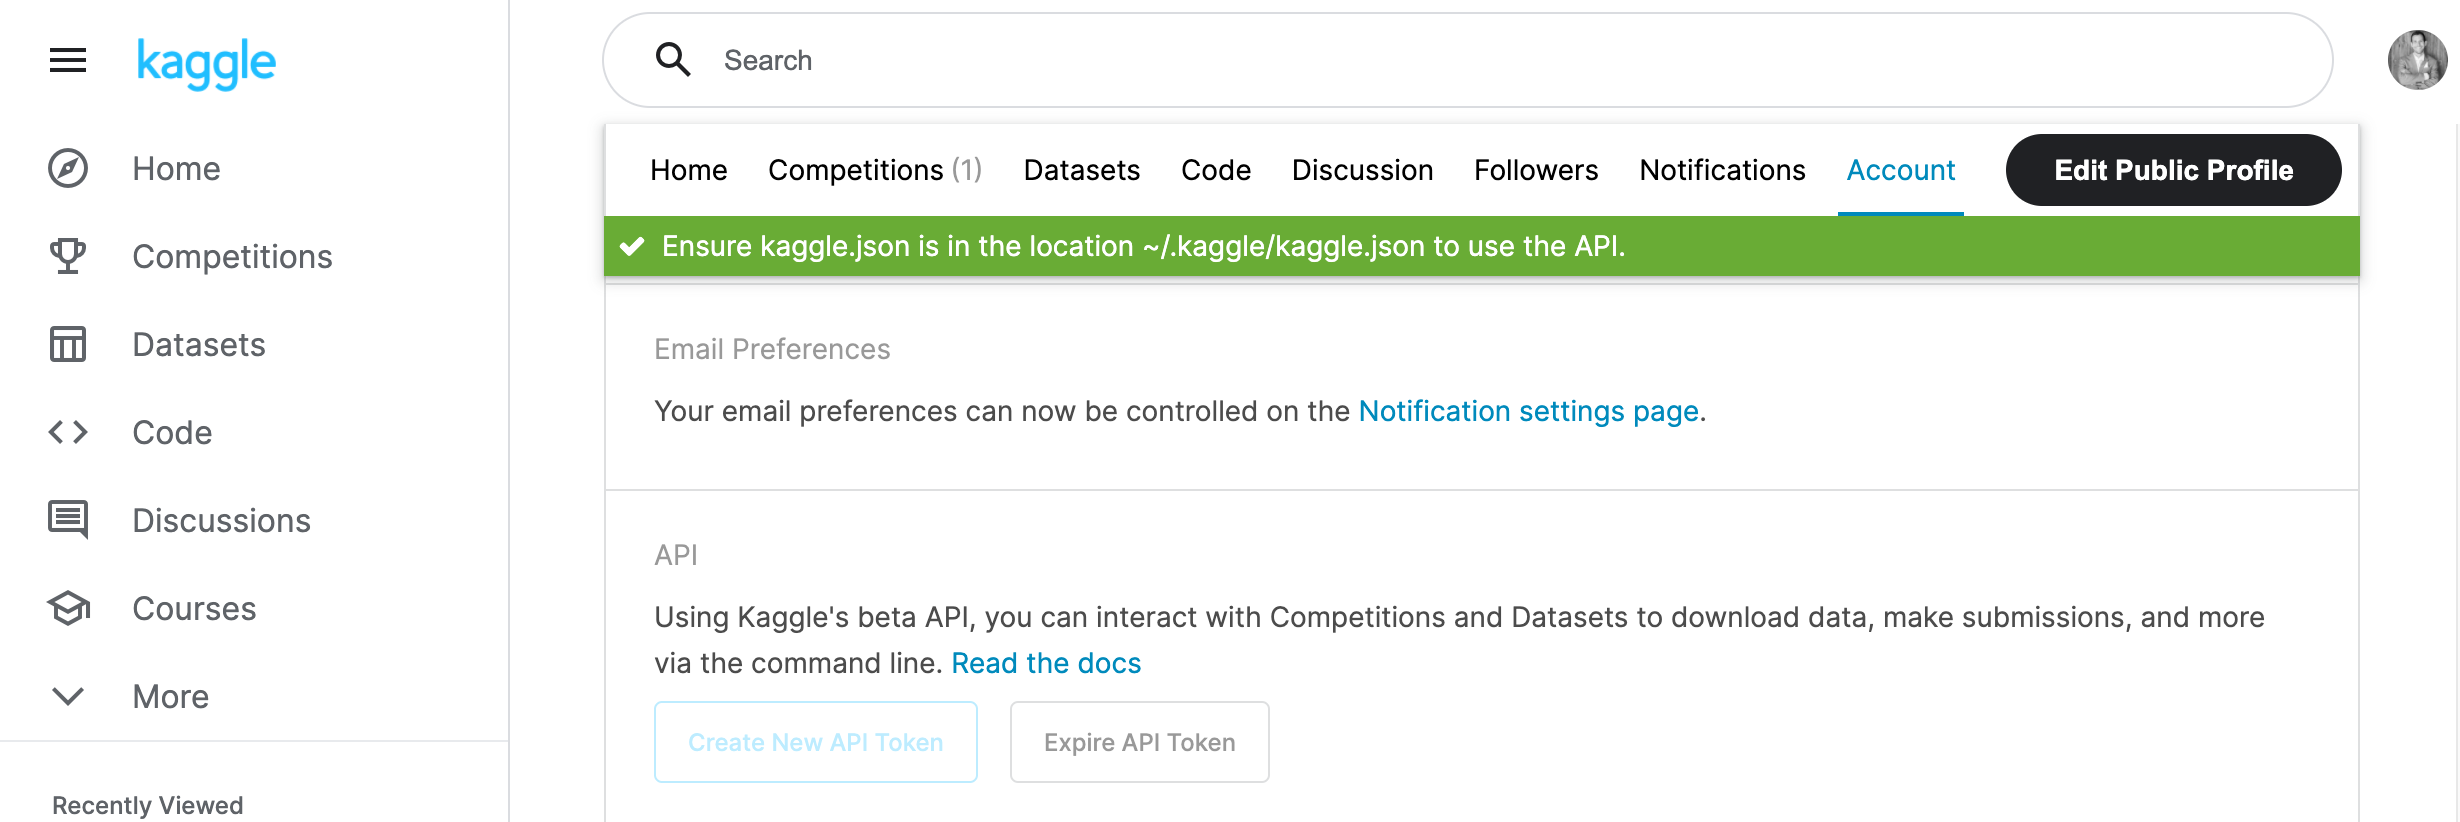
3. Open up `kaggle.json` and use the username and key.
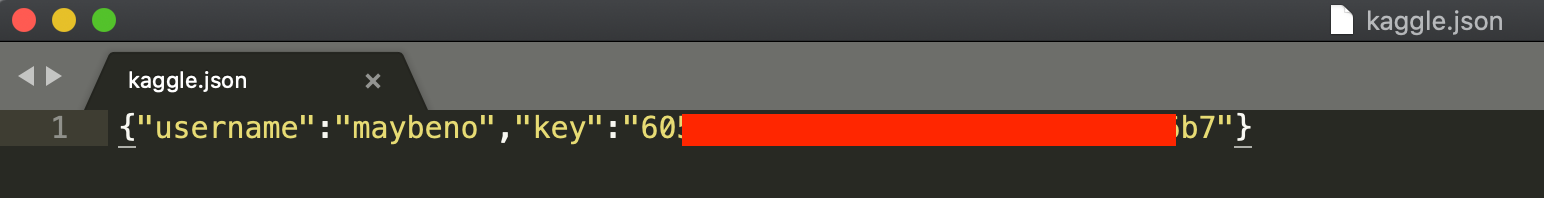

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 23.4 MB/s eta 0:00:0000:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.2.0
    Uninstalling setuptools-69.2.0:
      Successfully uninstalled setuptools-69.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.16.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.16.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.16.1 requires dash-table==5.0.0, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 60.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done


### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/home/sagemaker-user/.kaggle’: File exists


In [6]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "tingwithds"
kaggle_key = "1005ac8614d254f7a9e9f0c94111b290"

# Save API token the kaggle.json file
with open("/home/sagemaker-user/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
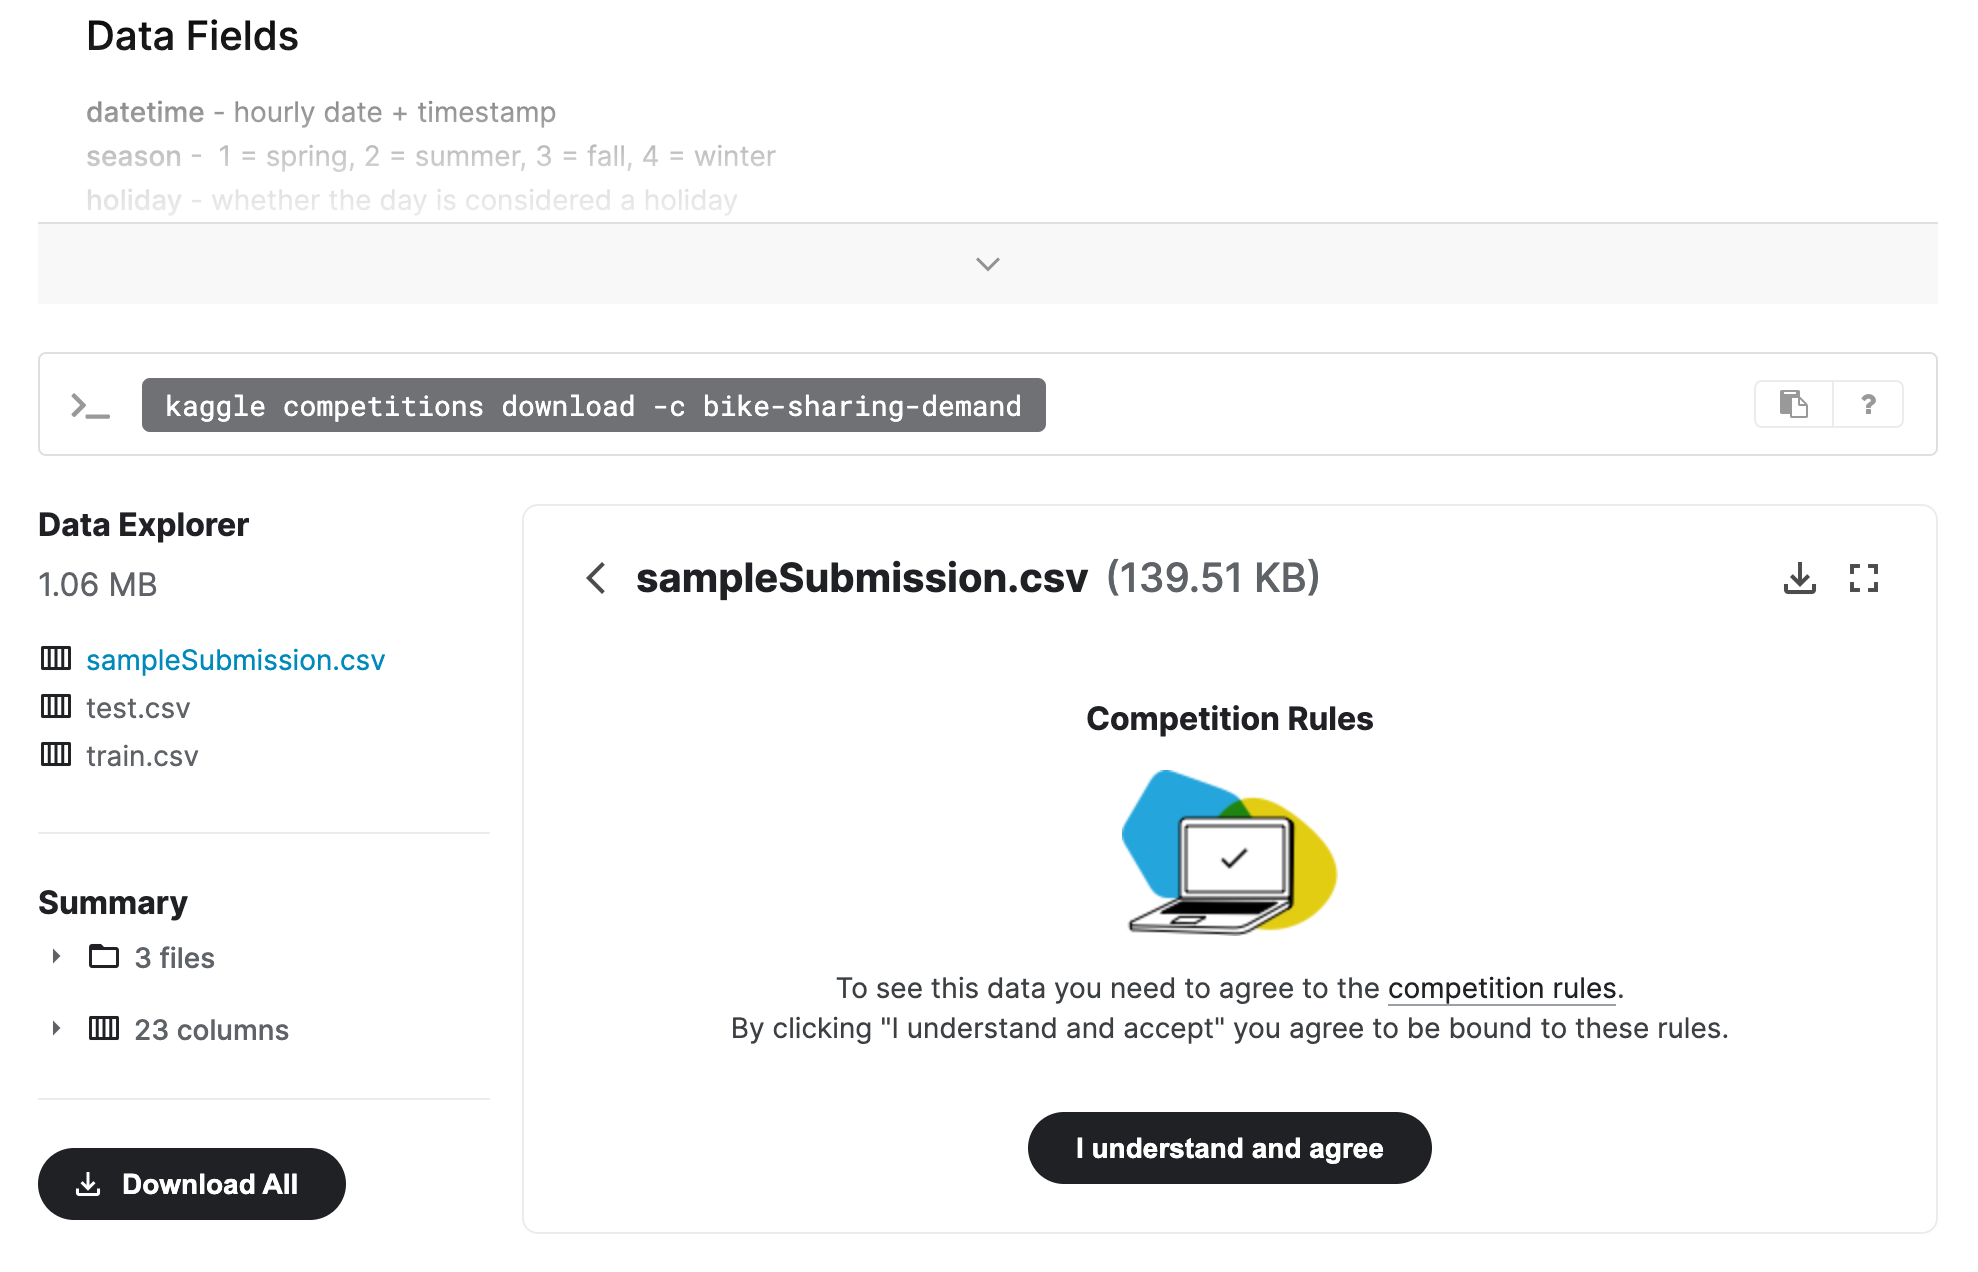

In [22]:
!pip install -q Kaggle

In [10]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 31.7MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
print("Train Dataset Shape : ", train.shape)
print("Test Dataset Shape  : ", test.shape)

Train Dataset Shape :  (10886, 12)
Test Dataset Shape  :  (6493, 9)


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [10]:
print("Variables that are not present in the test dataset: ")
list(set(train.columns).difference(set(test.columns)))

Variables that are not present in the test dataset: 


['count', 'registered', 'casual']

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
predictor = TabularPredictor(label='count', 
                             problem_type= 'regression', 
                             eval_metric='root_mean_squared_error', 
                             learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(
                                                                           train_data = train,
                                                                           time_limit=300,
                                                                           presets="medium_quality_faster_train")

No path specified. Models will be saved in: "AutogluonModels/ag-20240421_195038"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240421_195038"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   4.40 GB / 5.36 GB (82.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	2.28s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 294.58s of the 294.58s of remaining time.
	-134.0804	 = Validation score   (-root_mean_squared_error)
	1.02s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 293.42s of the 293.42s of remaining time.
	-122.0128	 = Validation score   (-root_mean_squared_error)
	15.58s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 276.97s of the 276.97s of remaining time.
	-134.2362	 = Validation score   (-root_mean_squared_error)
	7.37s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 269.59s of the 269.58s of remaining time.
	-128.4294	 = Validation score   (-root_mean_squared_error)
	7.49s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: Neu

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.442085       0.014391   0.021839                0.014391           0.021839            1       True          2
1   WeightedEnsemble_L2  -92.442085       0.016383   0.545110                0.001992           0.523270            2       True         12
2        KNeighborsUnif -109.739422       0.016639   2.653729                0.016639           2.653729            1       True          1
3       RandomForestMSE -122.012844       0.209228  15.584049                0.209228          15.584049            1       True          5
4         ExtraTreesMSE -128.429416       0.171451   7.491596                0.171451           7.491596            1       True          7
5         LightGBMLarge -132.173561       0.031213   1.587674                0.031213           1.

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -122.01284447953923,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.42941608551303,
  'NeuralNetFastAI': -136.5149023826015,
  'XGBoost': -135.0750870521187,
  'NeuralNetTorch': -140.02270087878156,
  'LightGBMLarge': -132.1735605846617,
  'WeightedEnsemble_L2': -92.44208479870365},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNe

In [13]:
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-92.442085,0.014391,0.021839,0.014391,0.021839,1,True,2
1,WeightedEnsemble_L2,-92.442085,0.016383,0.545110,0.001992,0.523270,2,True,12
2,KNeighborsUnif,-109.739422,0.016639,2.653729,0.016639,2.653729,1,True,1
3,RandomForestMSE,-122.012844,0.209228,15.584049,0.209228,15.584049,1,True,5
4,ExtraTreesMSE,-128.429416,0.171451,7.491596,0.171451,7.491596,1,True,7
5,LightGBMLarge,-132.173561,0.031213,1.587674,0.031213,1.587674,1,True,11
6,LightGBM,-134.080427,0.038250,1.019988,0.038250,1.019988,1,True,4
7,CatBoost,-134.236163,0.005424,7.367080,0.005424,7.367080,1,True,6
8,XGBoost,-135.075087,0.051122,1.960799,0.051122,1.960799,1,True,9
9,LightGBMXT,-135.958034,0.110591,2.282472,0.110591,2.282472,1,True,3


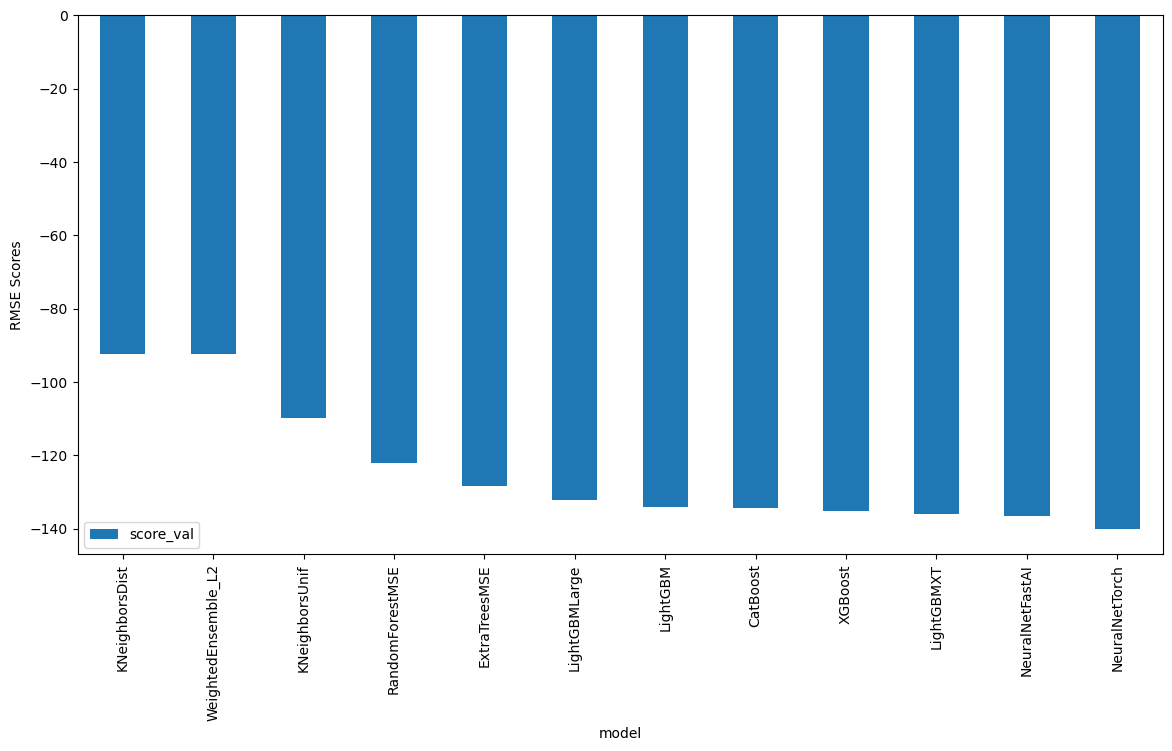

In [14]:
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

### Create predictions from test dataset

In [15]:
predictions = predictor.predict(test)
predictions.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [23]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      135.819412
std       132.525269
min         3.424214
25%        23.827692
50%        71.032265
75%       203.938919
max       537.853882
Name: count, dtype: float64

In [24]:
# How many negative values do we have?
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print("Total negative prediction values :", pred_neg_count)

Total negative prediction values : 0


In [25]:
# Set them to zero
predictions[predictions<0] = 0 

### Set predictions to submission dataframe, save, and submit

In [26]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [27]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 451kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [28]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-04-21 19:54:11  first raw submission  complete  1.86412      1.86412       
submission.csv  2024-04-21 19:04:35  first raw submission  complete  1.86412      1.86412       


#### Initial score of `1.864`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

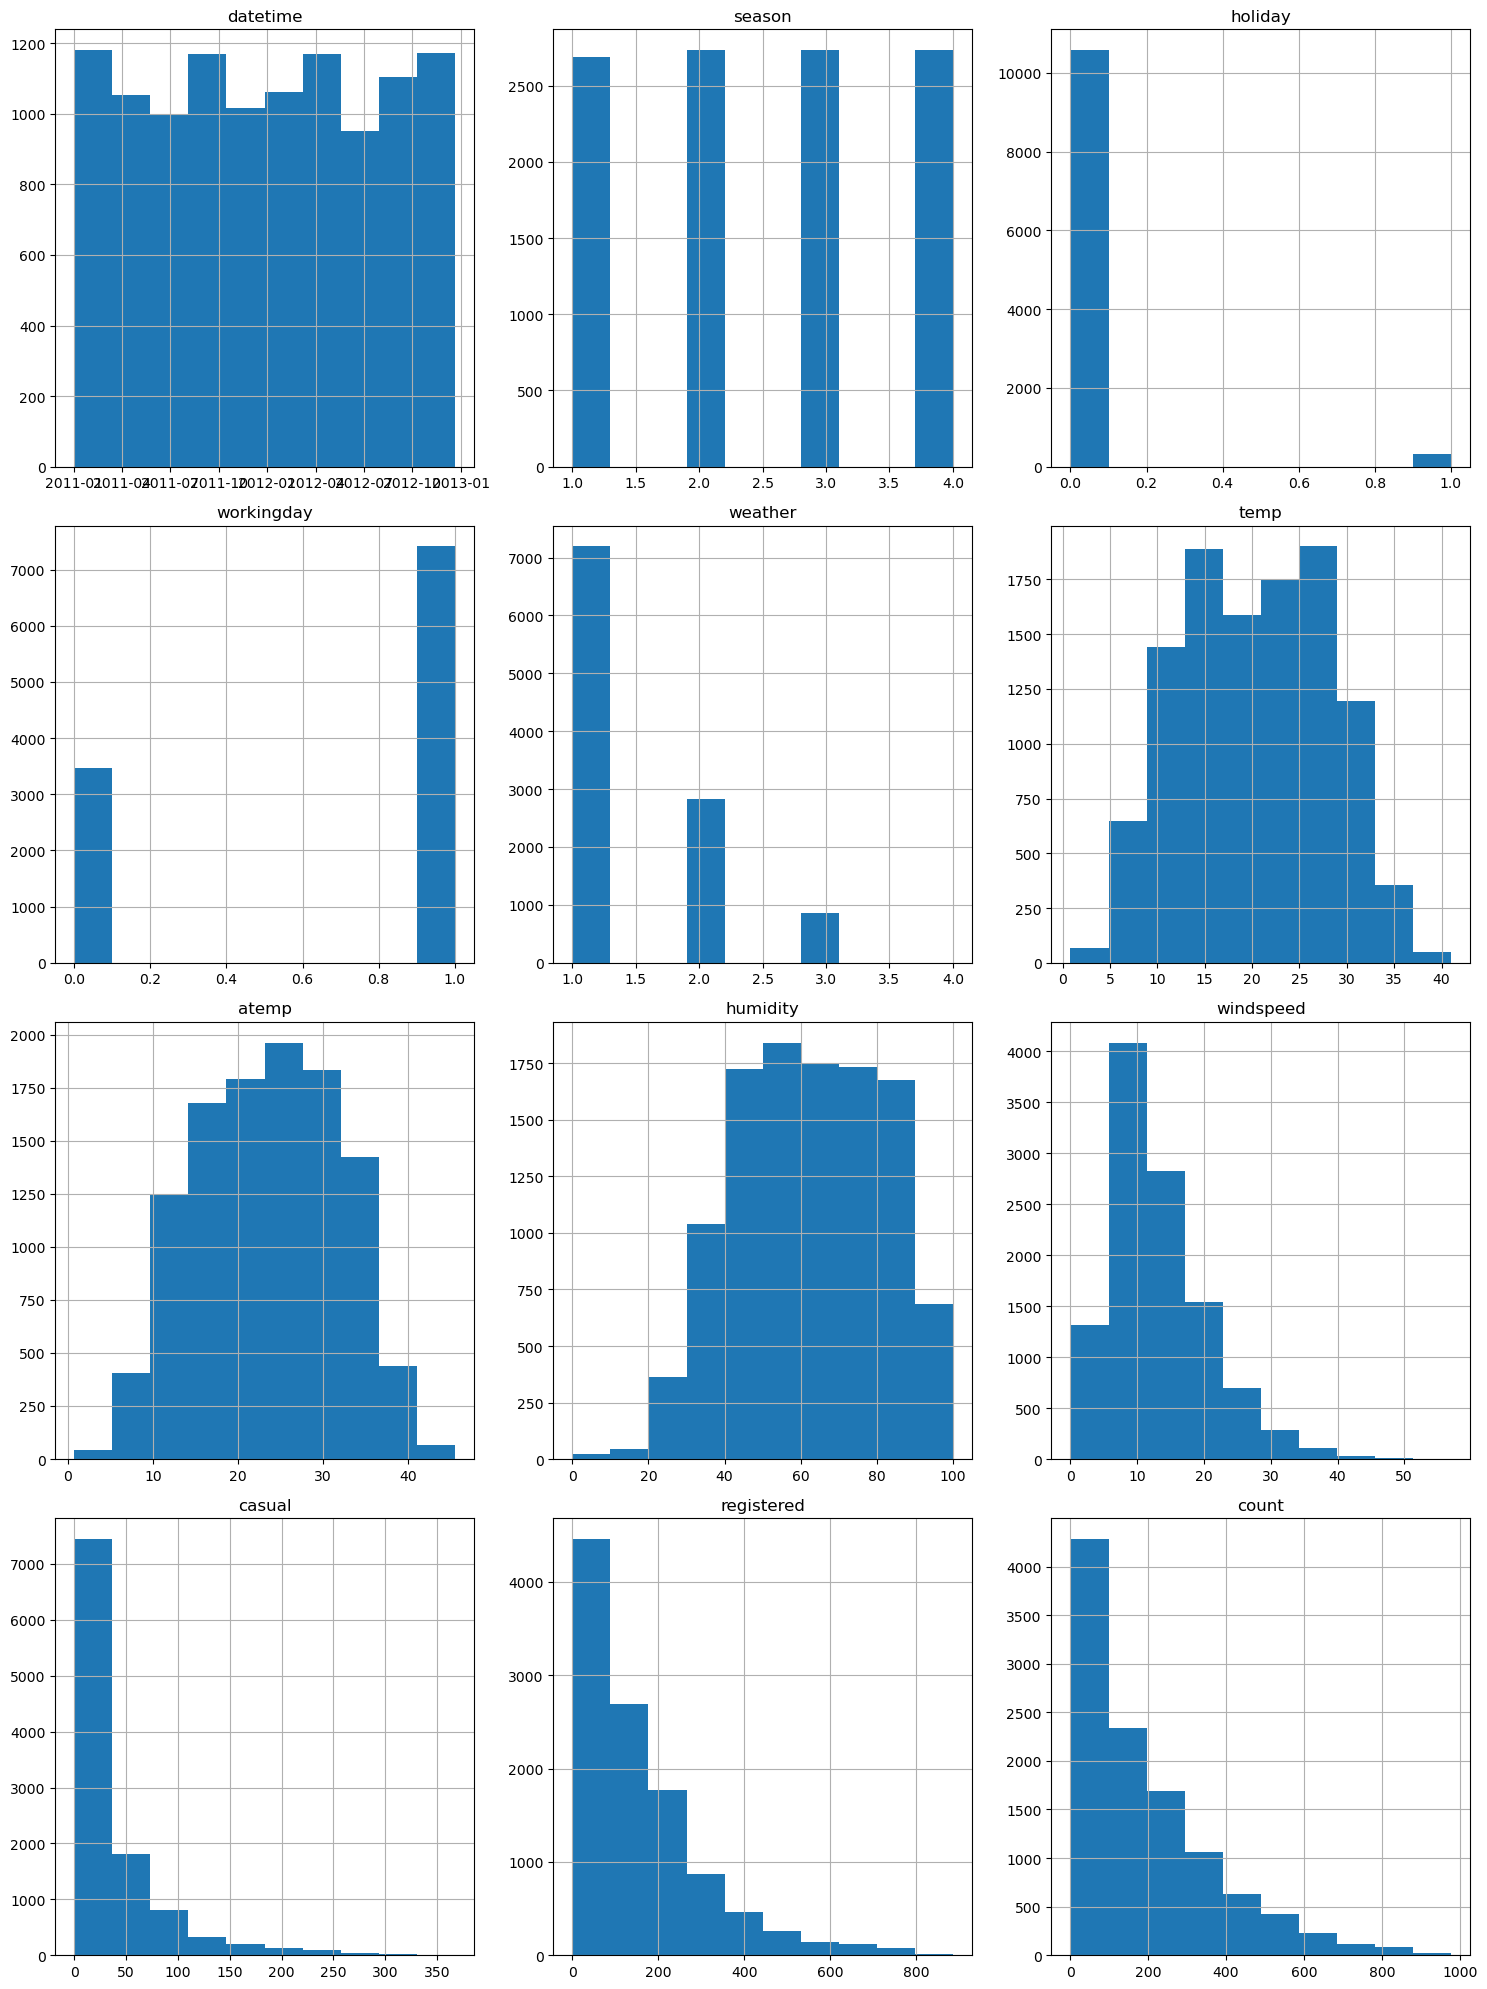

In [29]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,20))

plt.tight_layout()
plt.show()

In [31]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.4 MB/s eta 0:00:00


<Figure size 1800x1800 with 0 Axes>

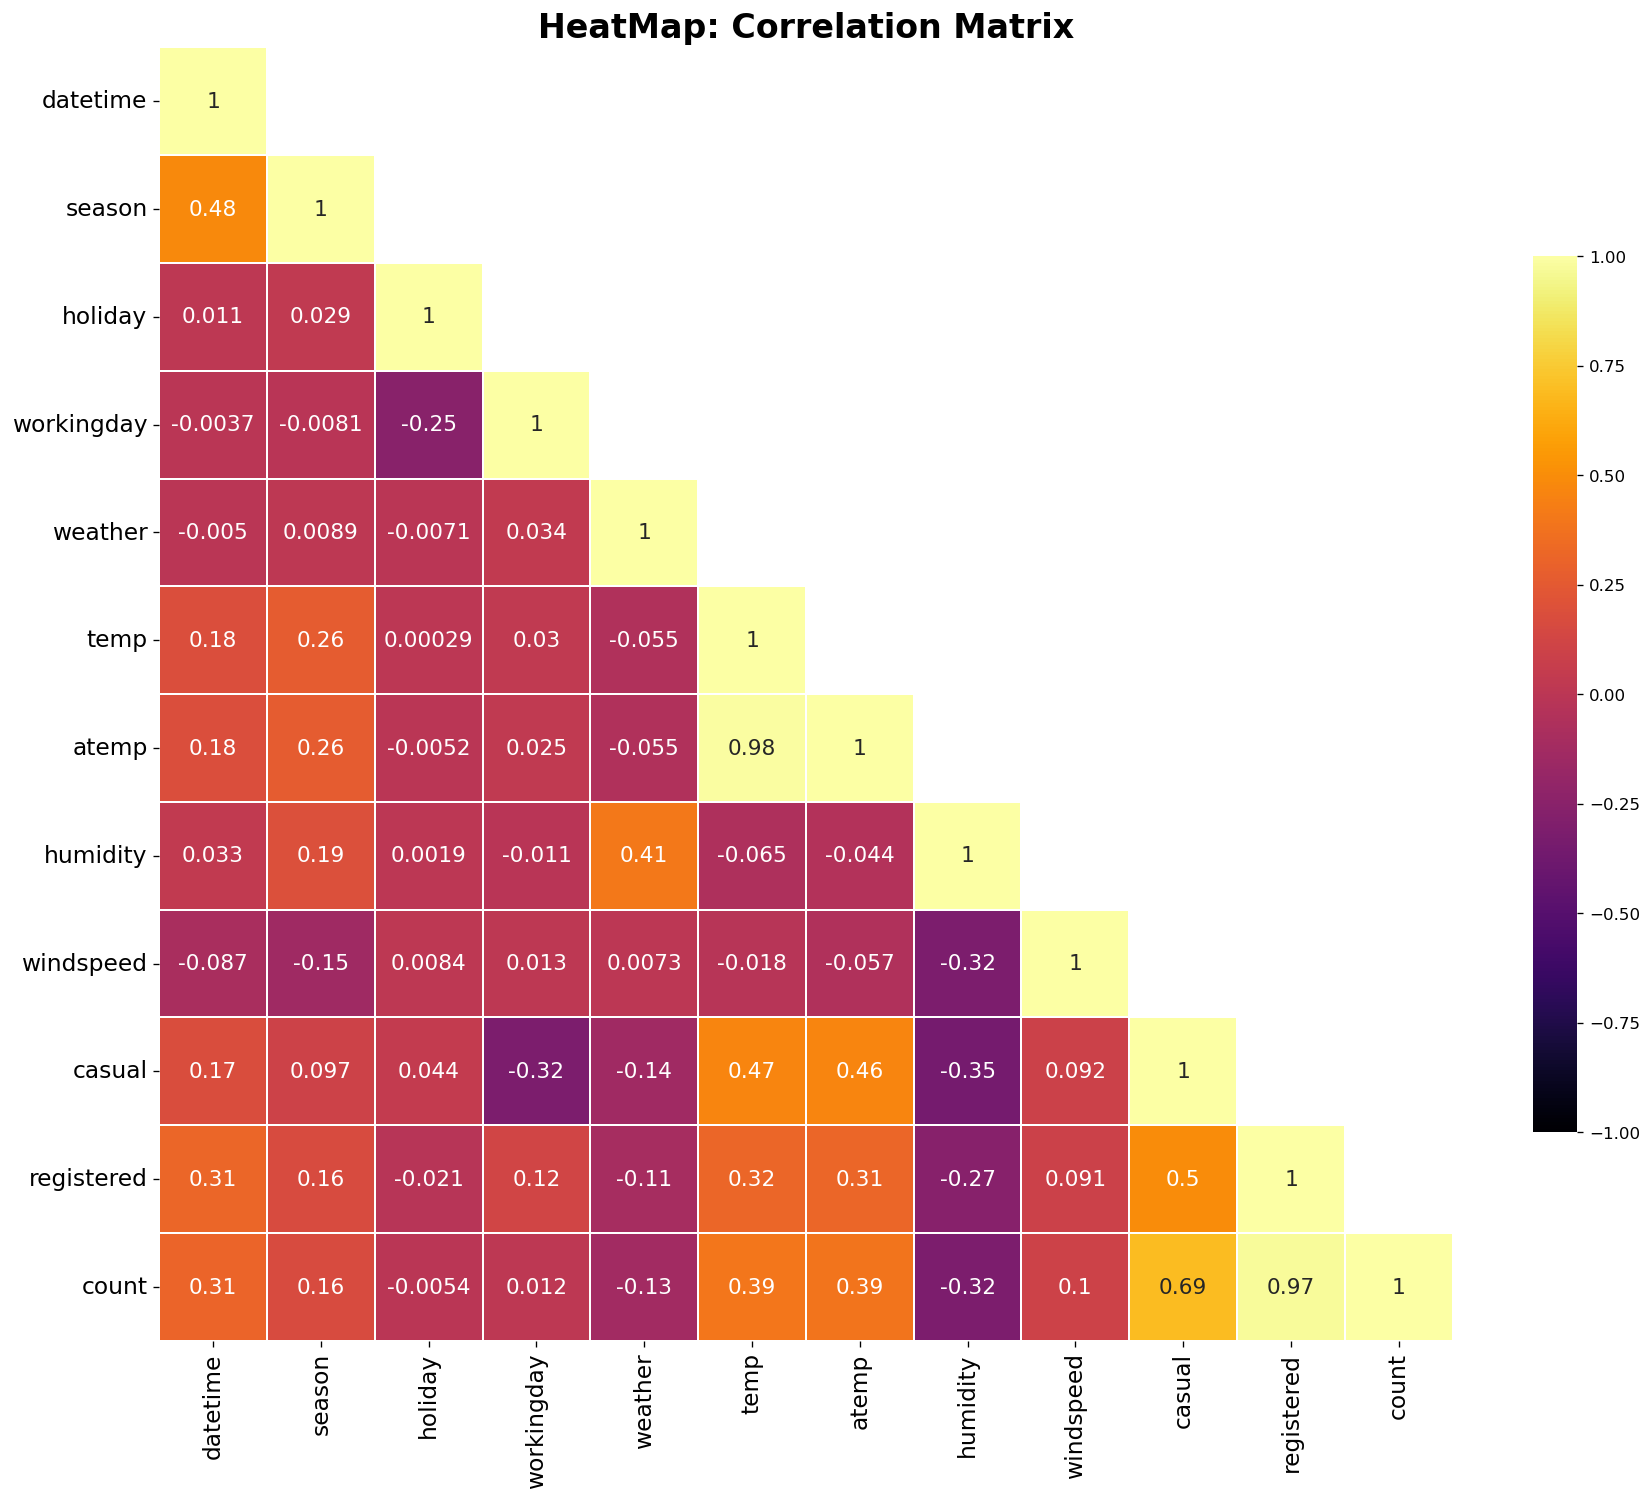

In [34]:
import numpy as np
import seaborn as sns
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'inferno', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

In [35]:
# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [36]:
# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [53]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

# New feature 'day_type' contains categories 'weekend', 'weekday', or 'holiday' (In Train and Test set)

# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


In [54]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int32   
 12  month       10886 non-null  int32   
 13  day         10886 non-null  int32   
 14  hour        10886 non-null  int32   
 15  day_type    10886 non-null  category
dtypes: category(3), float64(3), int32(4), int64(6)
memory usage: 968.1 KB


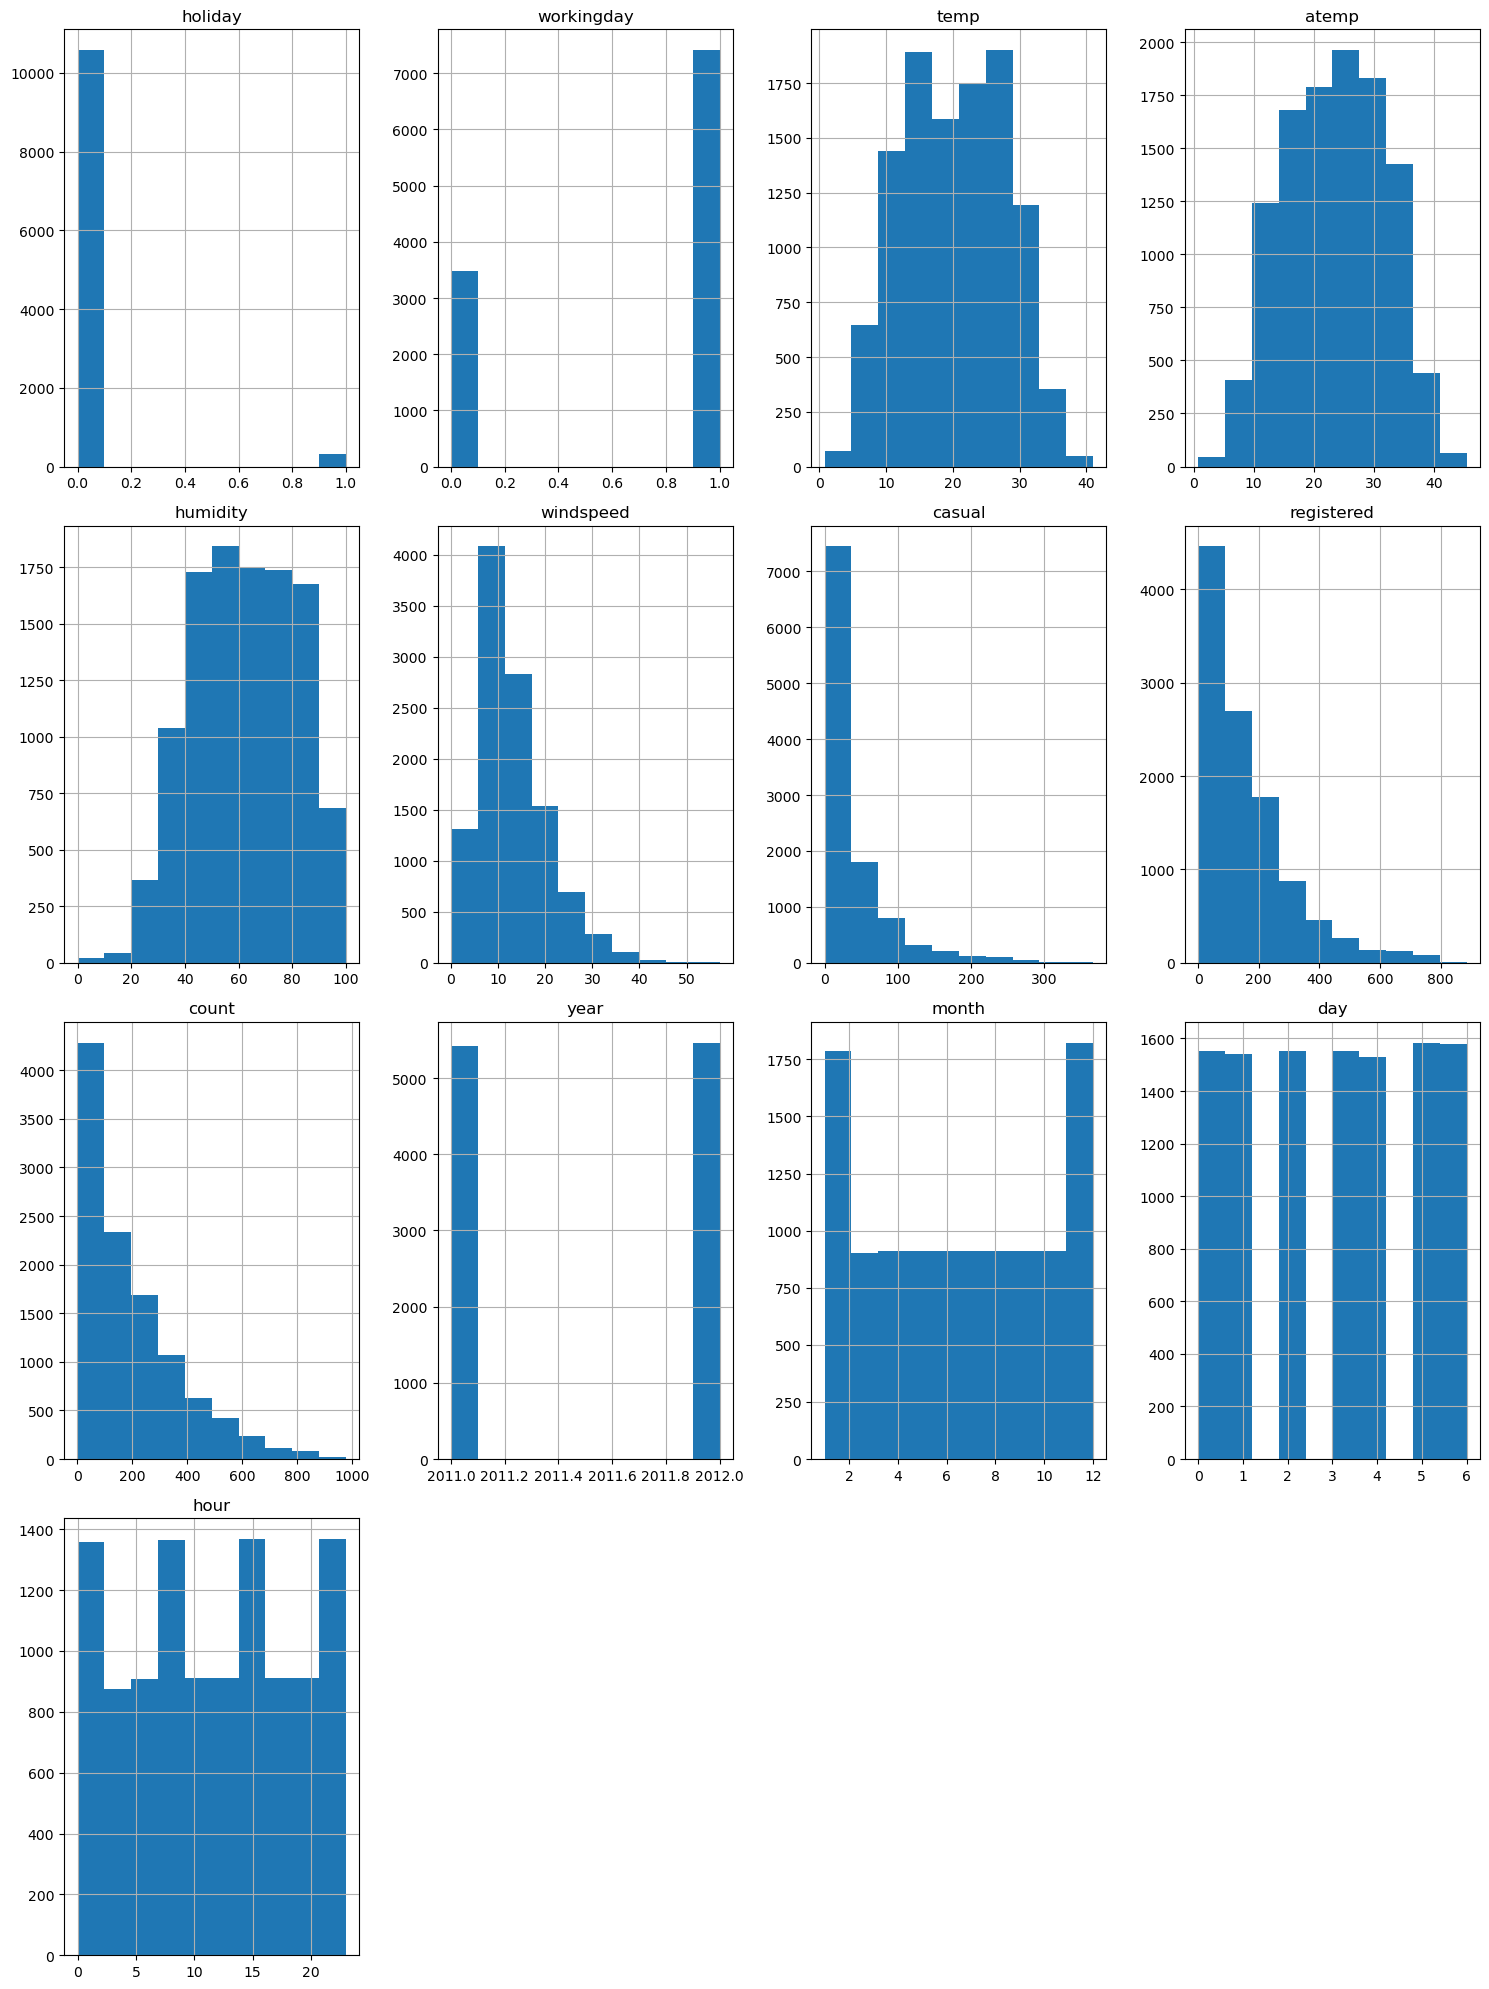

In [56]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))

plt.tight_layout()
plt.show()

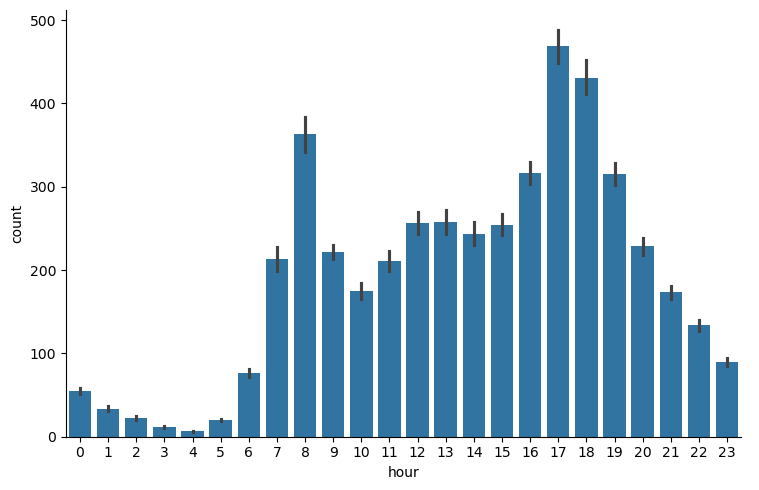

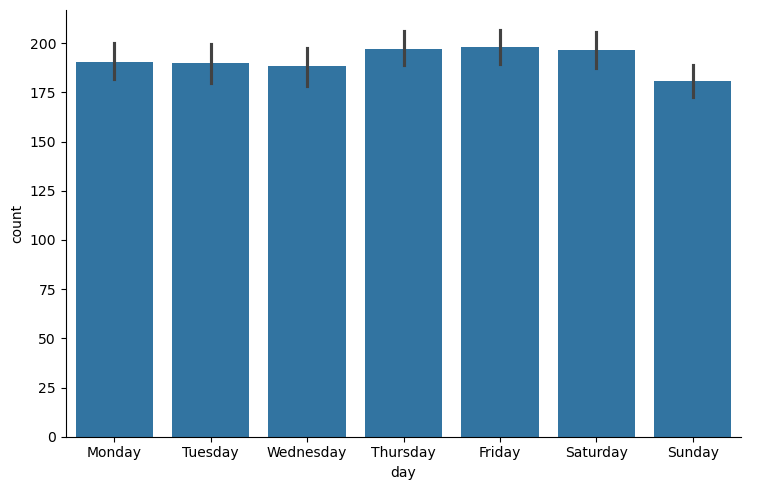

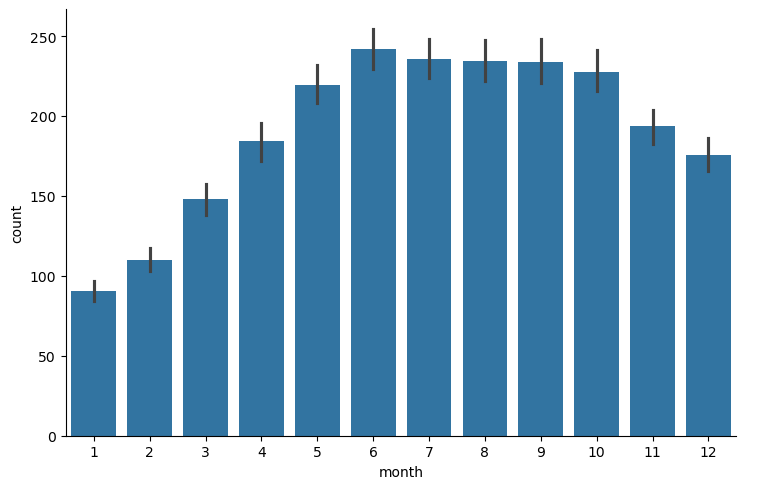

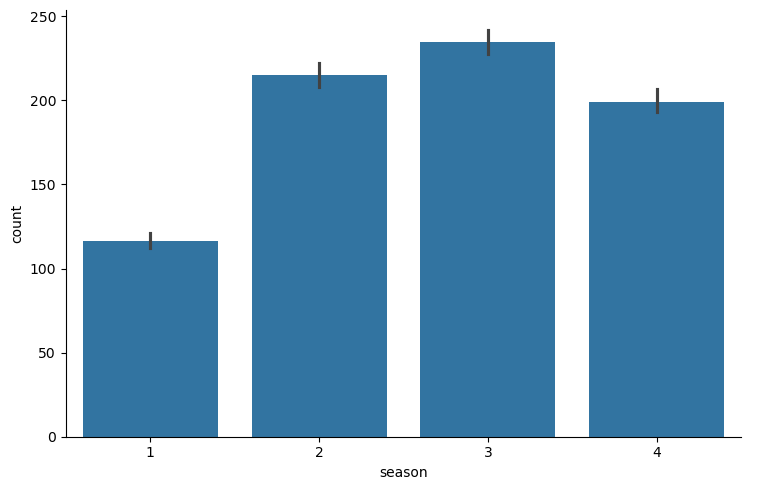

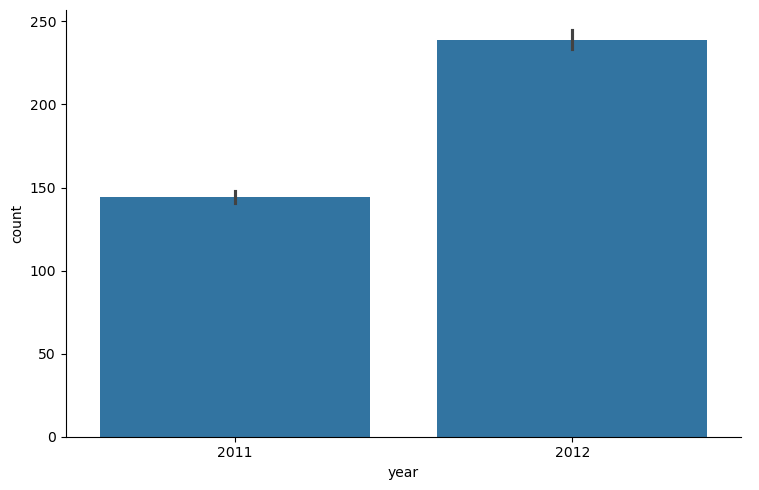

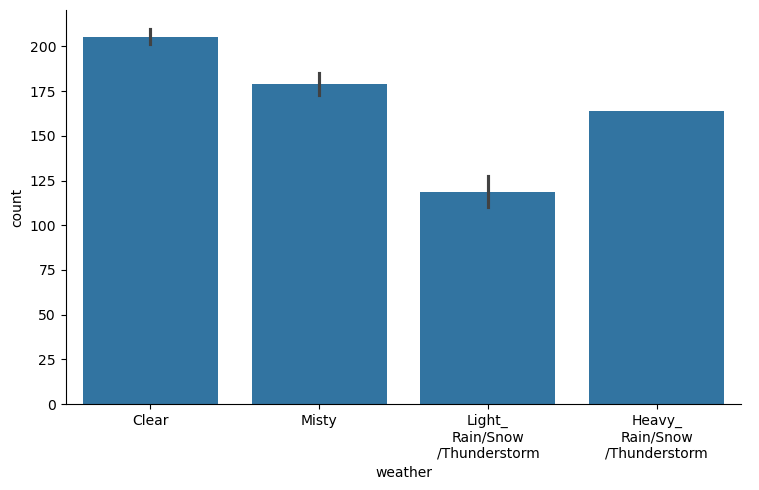

In [57]:
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.tight_layout()
plt.show()

sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday", 
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5) 
sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

sns.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.xticks(ticks=range(0,4), labels=["Clear","Misty", 
                                     "Light_\nRain/Snow\n/Thunderstorm", 
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
plt.tight_layout()
plt.show()



In [58]:
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [60]:
print("(Feature Engineering 1) Train Data Shape : ", train.shape)
print("(Feature Engineering 1) Test Data Shape  : ", test.shape)

(Feature Engineering 1) Train Data Shape :  (10886, 15)
(Feature Engineering 1) Test Data Shape  :  (6493, 12)


## Step 5: Rerun the model with the same settings as before, just with more features

In [63]:
predictor_FE1 = TabularPredictor(label='count', 
                             problem_type= 'regression', 
                             eval_metric='root_mean_squared_error', 
                             learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(
                                                                           train_data = train,
                                                                           time_limit=300,
                                                                           presets="medium_quality_faster_train")

No path specified. Models will be saved in: "AutogluonModels/ag-20240421_202746"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240421_202746"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.28 GB / 5.36 GB (61.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na

[1000]	valid_set's rmse: 40.0094
[2000]	valid_set's rmse: 38.9251
[3000]	valid_set's rmse: 38.7187
[4000]	valid_set's rmse: 38.5802
[5000]	valid_set's rmse: 38.5317
[6000]	valid_set's rmse: 38.5711


	-38.486	 = Validation score   (-root_mean_squared_error)
	8.36s	 = Training   runtime
	1.24s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 288.88s of the 288.88s of remaining time.


[1000]	valid_set's rmse: 38.5962


	-38.4128	 = Validation score   (-root_mean_squared_error)
	2.13s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 286.15s of the 286.15s of remaining time.
	-40.3662	 = Validation score   (-root_mean_squared_error)
	13.33s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 272.09s of the 272.08s of remaining time.
	-36.9289	 = Validation score   (-root_mean_squared_error)
	226.97s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 44.98s of the 44.97s of remaining time.
	-39.9107	 = Validation score   (-root_mean_squared_error)
	7.32s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 37.15s of the 37.14s of remaining time.
	-46.5935	 = Validation score   (-root_mean_squared_error)
	12.34s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: X

In [64]:
predictor_FE1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -35.413440       1.853360  276.053224                0.000778           0.592451            2       True         11
1              CatBoost  -36.928869       0.038284  226.972364                0.038284         226.972364            1       True          6
2              LightGBM  -38.412774       0.176144    2.129441                0.176144           2.129441            1       True          4
3            LightGBMXT  -38.486030       1.238294    8.362765                1.238294           8.362765            1       True          3
4               XGBoost  -38.868825       0.057270    2.070850                0.057270           2.070850            1       True          9
5         ExtraTreesMSE  -39.910741       0.186879    7.315129                0.186879      

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -117.28293483511298,
  'KNeighborsDist': -114.35160612241326,
  'LightGBMXT': -38.486030164592385,
  'LightGBM': -38.41277372991802,
  'RandomForestMSE': -40.36617984860418,
  'CatBoost': -36.9288691470801,
  'ExtraTreesMSE': -39.910740577024065,
  'NeuralNetFastAI': -46.59349934052559,
  'XGBoost': -38.86882484835541,
  'NeuralNetTorch': -48.4036751124384,
  'WeightedEnsemble_L2': -35.41344021438892},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighborsUnif'],
  'KNeighborsDist': ['KNeighborsDist'],
  'LightGBMXT': ['L

In [65]:
leaderboard_FE1_df = pd.DataFrame(predictor_FE1.leaderboard(silent=True))
leaderboard_FE1_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-35.413440,1.853360,276.053224,0.000778,0.592451,2,True,11
1,CatBoost,-36.928869,0.038284,226.972364,0.038284,226.972364,1,True,6
2,LightGBM,-38.412774,0.176144,2.129441,0.176144,2.129441,1,True,4
3,LightGBMXT,-38.486030,1.238294,8.362765,1.238294,8.362765,1,True,3
4,XGBoost,-38.868825,0.057270,2.070850,0.057270,2.070850,1,True,9
5,ExtraTreesMSE,-39.910741,0.186879,7.315129,0.186879,7.315129,1,True,7
6,RandomForestMSE,-40.366180,0.316077,13.325006,0.316077,13.325006,1,True,5
7,NeuralNetFastAI,-46.593499,0.031986,12.343942,0.031986,12.343942,1,True,8
8,NeuralNetTorch,-48.403675,0.026514,22.600346,0.026514,22.600346,1,True,10
9,KNeighborsDist,-114.351606,0.024804,0.020280,0.024804,0.020280,1,True,2


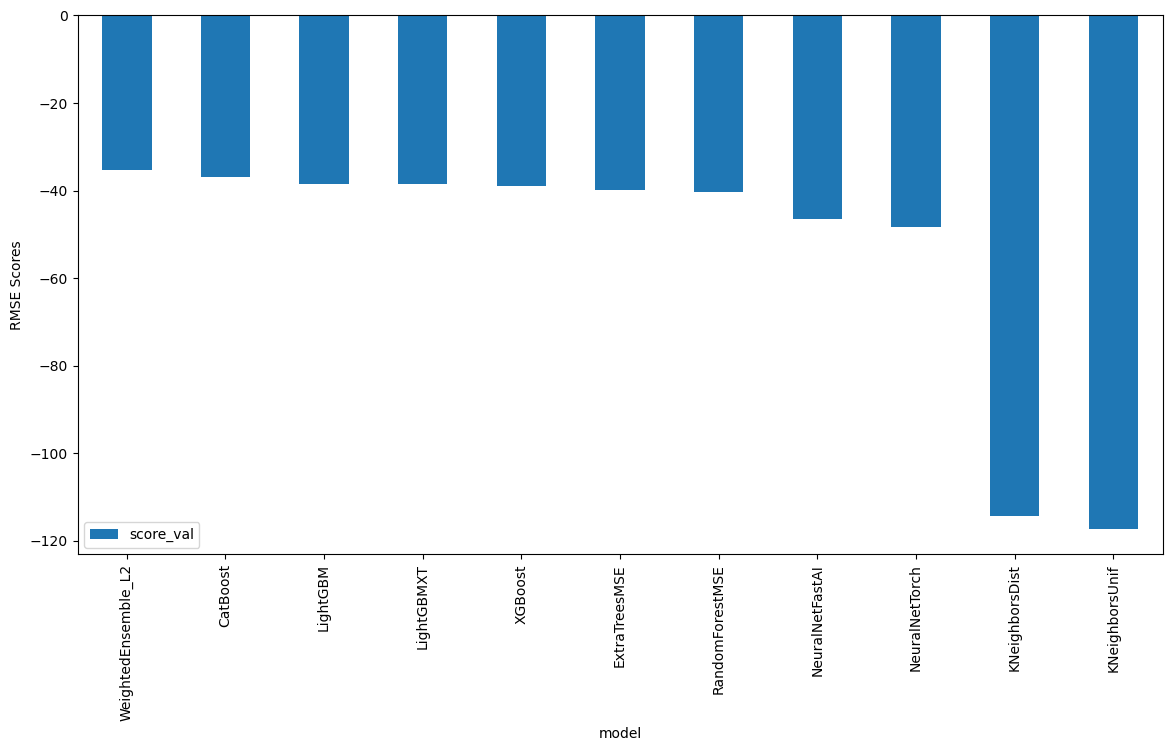

In [66]:
leaderboard_FE1_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

In [67]:
predictions_FE1 = predictor_FE1.predict(test)
predictions_FE1.head()

0    10.839075
1     5.038006
2     3.346882
3     0.510770
4     0.456474
Name: count, dtype: float32

In [68]:
# Remember to set all negative values to zero
negative_pred_count = predictions_FE1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print("Total negative prediction values :", pred_neg_count)

Total negative prediction values : 116


In [69]:
predictions_FE1[predictions_FE1<0] = 0 

In [71]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [72]:
# Same submitting predictions
submission_new_features["count"] = predictions_FE1
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [73]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 331kB/s]
Successfully submitted to Bike Sharing Demand

In [74]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-21 20:36:15  new features          complete  0.56496      0.56496       
submission.csv               2024-04-21 19:54:11  first raw submission  complete  1.86412      1.86412       
submission.csv               2024-04-21 19:04:35  first raw submission  complete  1.86412      1.86412       


#### New Score of `0.564`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [75]:
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"

In [76]:
import autogluon.core as ag
## From autogluon documentation

nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240421_204340"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240421_204340"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   2.72 GB / 5.36 GB (50.8%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.65s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-45.8136	 = Validation score   (-root_mean_squared_error)
	1.12s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-47.839	 = Validation score   (-root_mean_squared_error)
	1.11s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-41.7586	 = Validation score   (-root_mean_squared_error)
	0.95s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-66.7598	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-107.2717	 = Validation score   (-root_mean_squared_error)
	0.76s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-45.7988	 = Validation score   (-root_mean_squared_error)
	0.68s	 = Train

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808
[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913
[6000]	valid_set's rmse: 39.0335
[7000]	valid_set's rmse: 39.035
[8000]	valid_set's rmse: 39.07
[1000]	valid_set's rmse: 43.5792
[2000]	valid_set's rmse: 41.0624
[3000]	valid_set

	Ran out of time, early stopping on iteration 3404. Best iteration is:
	[3401]	valid_set's rmse: 38.0451
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.2s	 = Training   runtime
	0.34s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.53s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.77s	 = Training   runtime
	0.42s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	9.85s	 = Training   runtime
	2.39s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.86s	 = Training   runtime
	0.24s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	4.13s	 = Training   runtime
	0.62s

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: NeuralNetTorch/T1 ...
	-115.318	 = Validation score   (-root_mean_squared_error)
	1.45s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/T2 ...
	-69.1741	 = Validation score   (-root_mean_squared_error)
	3.75s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/T3 ...
	-91.5597	 = Validation score   (-root_mean_squared_error)
	3.9s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/T4 ...
	-66.7986	 = Validation score   (-root_mean_squared_error)
	6.74s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/T5 ...
	-140.1766	 = Validation score   (-root_mean_squared_error)
	9.11s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: NeuralNetTorch/T6 ...
	-144.0203	 = Validation score   (-root_mean_squared_error)
	2.66s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/T7 ...
	-141.8841	 = Validation score   (-root_mean_

In [77]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.702919       6.802735  29.570952                0.000471           0.273757            2       True          5
1         LightGBM/T16 -37.844296       3.995889  12.834602                3.995889          12.834602            1       True          2
2         LightGBM/T17 -38.045106       1.847765   7.663151                1.847765           7.663151            1       True          3
3         LightGBM/T13 -38.369670       0.930069   5.052462                0.930069           5.052462            1       True          1
4    NeuralNetTorch/T2 -69.174136       0.028542   3.746981                0.028542           3.746981            1       True          4
Number of models trained: 5
Types of models trained:
{'WeightedEnsembleModel', 'TabularNeuralNetTorchModel', '

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T13': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'NeuralNetTorch/T2': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T13': -38.3696701247306,
  'LightGBM/T16': -37.8442961045261,
  'LightGBM/T17': -38.04510641711405,
  'NeuralNetTorch/T2': -69.17413605274908,
  'WeightedEnsemble_L2': -37.702918646790714},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T13': ['LightGBM', 'T13'],
  'LightGBM/T16': ['LightGBM', 'T16'],
  'LightGBM/T17': ['LightGBM', 'T17'],
  'NeuralNetTorch/T2': ['NeuralNetTorch', 'T2'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T13': 5.052461624145508,
  'LightGBM/T16': 12.834601879119873,
  'LightGBM/T17': 7.6631505489349365,
  'NeuralNetTorch/T2': 3.746980905532837,
  'WeightedEnsemble_L2': 0.2737574577331543},
 'model_pred_times': {'LightGBM/T13': 0.9300687313079834,
  'LightGBM/T16': 3.

In [78]:
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.702919,6.802735,29.570952,0.000471,0.273757,2,True,5
1,LightGBM/T16,-37.844296,3.995889,12.834602,3.995889,12.834602,1,True,2
2,LightGBM/T17,-38.045106,1.847765,7.663151,1.847765,7.663151,1,True,3
3,LightGBM/T13,-38.369670,0.930069,5.052462,0.930069,5.052462,1,True,1
4,NeuralNetTorch/T2,-69.174136,0.028542,3.746981,0.028542,3.746981,1,True,4


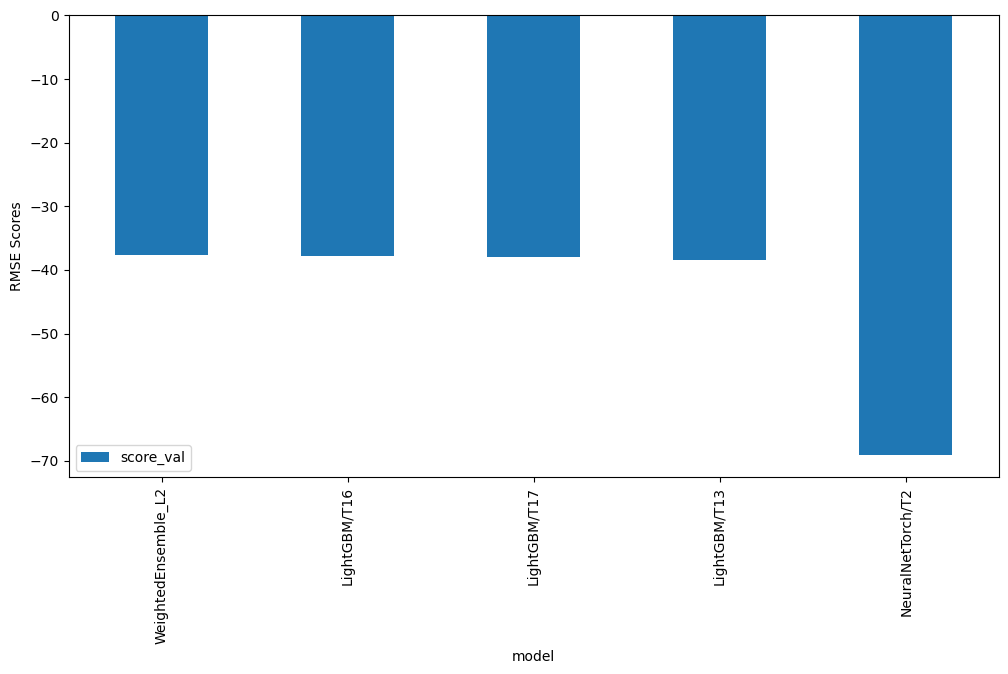

In [79]:
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [81]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    18.780888
1     2.141703
2     0.197099
3     1.588537
4     1.610576
Name: count, dtype: float32

In [82]:
# Remember to set all negative values to zero
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print("Total negative prediction values :", pred_neg_count)

Total negative prediction values : 110


In [83]:
predictions_new_hpo[predictions_new_hpo<0] = 0

In [84]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [85]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [86]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 340kB/s]
Successfully submitted to Bike Sharing Demand

In [87]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-21 20:54:57  new features with hyperparameters  complete  0.55508      0.55508       
submission_new_features.csv  2024-04-21 20:36:15  new features                       complete  0.56496      0.56496       
submission.csv               2024-04-21 19:54:11  first raw submission               complete  1.86412      1.86412       
submission.csv               2024-04-21 19:04:35  first raw submission               complete  1.86412      1.86412       


#### New Score of `0.555`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

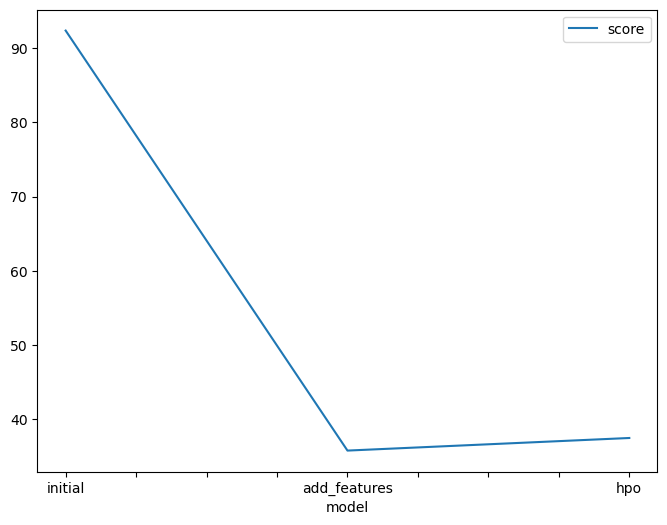

In [92]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [92.4, 35.7, 37.4]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

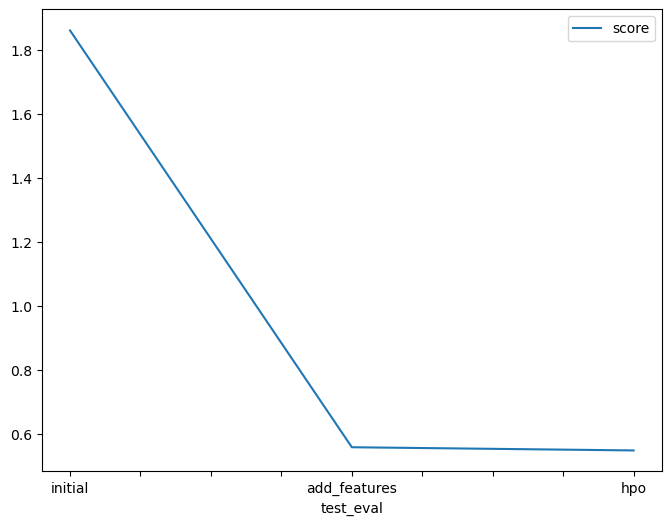

In [96]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.86, 0.56, 0.55]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [95]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default values", "default values", "GBM"],
    "hpo2": ["default values", "default values", "NN"],
    "hpo3": ["presets:  medium_quality_faster_train", "presets: medium_quality_faster_train", "presets: best quality"],
    "score": ["1.86", "0.56", "0.55"]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default values,default values,presets: medium_quality_faster_train,1.86
1,add_features,default values,default values,presets: medium_quality_faster_train,0.56
2,hpo,GBM,NN,presets: best quality,0.55
